# Package import and Data Loading

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import torch
import random
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from utils import *

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.44MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.74MB/s]


torch.Size([64, 1, 28, 28]) torch.Size([64])


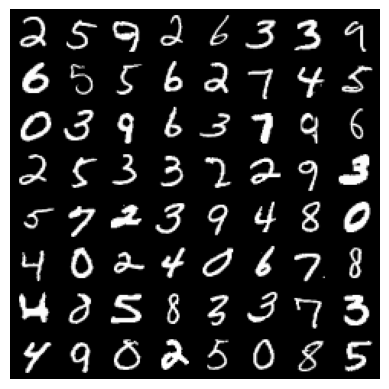

In [3]:
# 2. Data loading
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

x, y = next(iter(train_loader))
print(x.shape, y.shape)

npimg = torchvision.utils.make_grid(x).numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.axis('off')
plt.show()

# Model Definition, Running and Results:

In [4]:
# Hyperparameters
learning_rate = 0.01
epochs = 5

# Define model, loss and optimizer

class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.net(x)



class NN_BN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.net(x)

criterion = nn.CrossEntropyLoss()

model_no_bn = NN()
optimizer_1 = optim.Adam(model_no_bn.parameters(), lr=learning_rate)

model_bn = NN_BN()
optimizer_2 = optim.Adam(model_bn.parameters(), lr=learning_rate)


In [5]:
batch_sizes = [8, 32, 128, 256]
loss_across_batch_no_bn = list()
accuracy_across_batch_no_bn = list()

for batch_size in batch_sizes:
  print(f"######## TRAINING FOR BATCH SIZE: {batch_size} ###################")

  model_no_bn = NN()
  optimizer_1 = optim.Adam(model_no_bn.parameters(), lr=learning_rate)

  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

  # Train model without BatchNorm with Adam
  loss_no_bn, acc_no_bn = train_model(model_no_bn, optimizer_1, criterion,
                                      train_loader, test_loader, epochs)
  loss_across_batch_no_bn.append(np.mean(loss_no_bn))
  accuracy_across_batch_no_bn.append(np.mean(acc_no_bn))

######## TRAINING FOR BATCH SIZE: 8 ###################


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Training batches:   0%|          | 0/7500 [00:00<?, ?it/s]

Training batches:   0%|          | 0/7500 [00:00<?, ?it/s]

Training batches:   0%|          | 0/7500 [00:00<?, ?it/s]

Training batches:   0%|          | 0/7500 [00:00<?, ?it/s]

Training batches:   0%|          | 0/7500 [00:00<?, ?it/s]

######## TRAINING FOR BATCH SIZE: 32 ###################


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1875 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1875 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1875 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1875 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1875 [00:00<?, ?it/s]

######## TRAINING FOR BATCH SIZE: 128 ###################


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

######## TRAINING FOR BATCH SIZE: 256 ###################


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Training batches:   0%|          | 0/235 [00:00<?, ?it/s]

Training batches:   0%|          | 0/235 [00:00<?, ?it/s]

Training batches:   0%|          | 0/235 [00:00<?, ?it/s]

Training batches:   0%|          | 0/235 [00:00<?, ?it/s]

Training batches:   0%|          | 0/235 [00:00<?, ?it/s]

In [6]:
loss_across_batch_bn = list()
accuracy_across_batch_bn = list()

for batch_size in batch_sizes:
  print(f"######## TRAINING FOR BATCH SIZE: {batch_size} ###################")
  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

  model_bn = NN_BN()
  optimizer_2 = optim.Adam(model_bn.parameters(), lr=learning_rate)

  # Train model with BatchNorm with Adam
  loss_bn, acc_bn = train_model(model_bn, optimizer_2, criterion, train_loader,
                                test_loader, epochs)

  loss_across_batch_bn.append(np.mean(loss_bn))
  accuracy_across_batch_bn.append(np.mean(acc_bn))


######## TRAINING FOR BATCH SIZE: 8 ###################


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Training batches:   0%|          | 0/7500 [00:00<?, ?it/s]

Training batches:   0%|          | 0/7500 [00:00<?, ?it/s]

Training batches:   0%|          | 0/7500 [00:00<?, ?it/s]

Training batches:   0%|          | 0/7500 [00:00<?, ?it/s]

Training batches:   0%|          | 0/7500 [00:00<?, ?it/s]

######## TRAINING FOR BATCH SIZE: 32 ###################


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1875 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1875 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1875 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1875 [00:00<?, ?it/s]

Training batches:   0%|          | 0/1875 [00:00<?, ?it/s]

######## TRAINING FOR BATCH SIZE: 128 ###################


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

######## TRAINING FOR BATCH SIZE: 256 ###################


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Training batches:   0%|          | 0/235 [00:00<?, ?it/s]

Training batches:   0%|          | 0/235 [00:00<?, ?it/s]

Training batches:   0%|          | 0/235 [00:00<?, ?it/s]

Training batches:   0%|          | 0/235 [00:00<?, ?it/s]

Training batches:   0%|          | 0/235 [00:00<?, ?it/s]

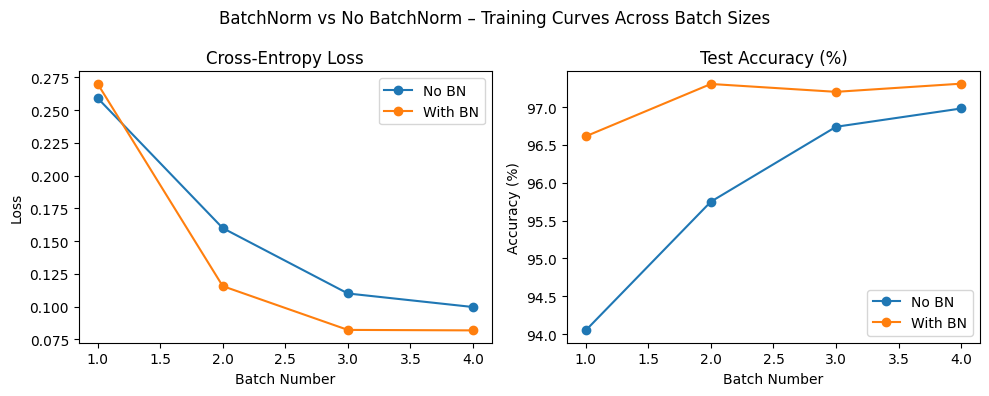

In [7]:
plot_compare_training_batch_curves(
    loss_bn=loss_across_batch_bn,
    loss_no_bn=loss_across_batch_no_bn,
    acc_bn=accuracy_across_batch_bn,
    acc_no_bn=accuracy_across_batch_no_bn,
    batch_number=len(batch_sizes)
)


In [33]:
model_no_bn = NN()
optimizer_1 = optim.Adam(model_no_bn.parameters(), lr=learning_rate)

model_bn = NN_BN()
optimizer_2 = optim.Adam(model_bn.parameters(), lr=learning_rate)

In [62]:
# Train model with BatchNorm with Adam and without eval_activated

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

loss_bn_no_eval_2, acc_bn_no_eval_2 = train_model(model_bn, optimizer_2, criterion,
                                              train_loader, test_loader, epochs = 15,
                                              eval_status = False)

Epochs:   0%|          | 0/15 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

In [63]:
model_bn = NN_BN()
optimizer_2 = optim.Adam(model_bn.parameters(), lr=learning_rate)

In [64]:
# Train model with BatchNorm with Adam and with eval_activated

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

loss_bn_eval_2, acc_bn_eval_2 = train_model(model_bn, optimizer_2, criterion,
                                        train_loader, test_loader, epochs = 15)

Epochs:   0%|          | 0/15 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

Training batches:   0%|          | 0/469 [00:00<?, ?it/s]

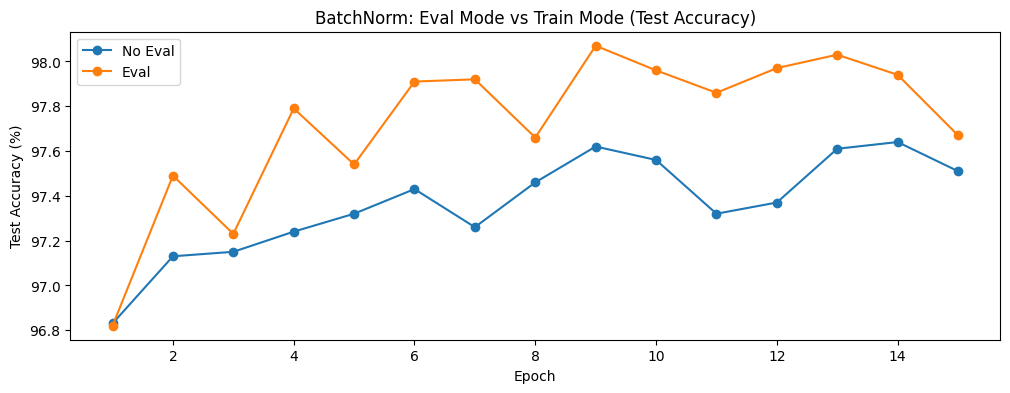

In [65]:
plot_compare_training_eval_curves(
    acc_eval=acc_bn_eval_2,
    acc_no_eval=acc_bn_no_eval_2,
    epochs=15
)

In [66]:
model_no_bn = NN()
optimizer_1 = optim.Adam(model_no_bn.parameters(), lr=learning_rate)

model_bn = NN_BN()
optimizer_2 = optim.Adam(model_bn.parameters(), lr=learning_rate)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

_ , _ = train_model(model_no_bn, optimizer_1, criterion,
                   train_loader, test_loader, epochs = 10)

_ , _ = train_model(model_bn, optimizer_2, criterion,
                   train_loader, test_loader, epochs = 10)

In [72]:
# Obtention of dead neuron statistics.

acts_no_bn = get_relu_activations(model_no_bn, train_loader)
acts_bn = get_relu_activations(model_bn, train_loader)

dead_no_bn, avg_zero_no_bn = count_dead_neurons(acts_no_bn)
dead_bn, avg_zero_bn = count_dead_neurons(acts_bn)

No BN: dead neurons = 142, avg zero rate = 0.958
With BN: dead neurons = 5, avg zero rate = 0.769


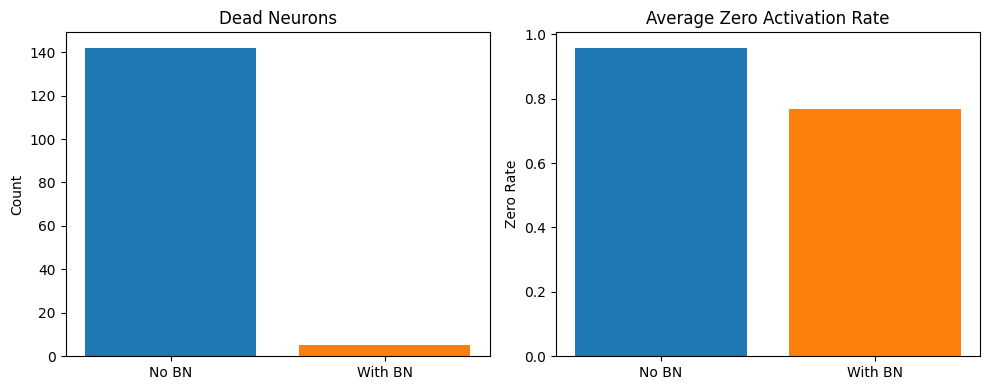

In [11]:
dead_neuron_plot(dead_no_bn, avg_zero_no_bn, dead_bn, avg_zero_bn)

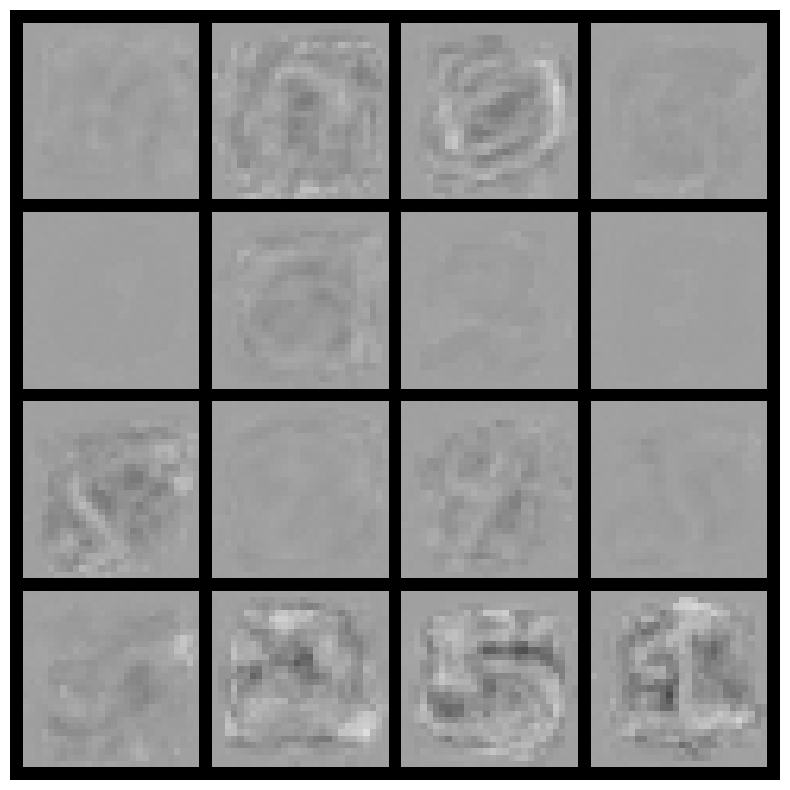

In [68]:
# Visualize linear weights for Non normalized model
visualize_linear1_weights_2d(model_no_bn, input_shape=(1, 28, 28))

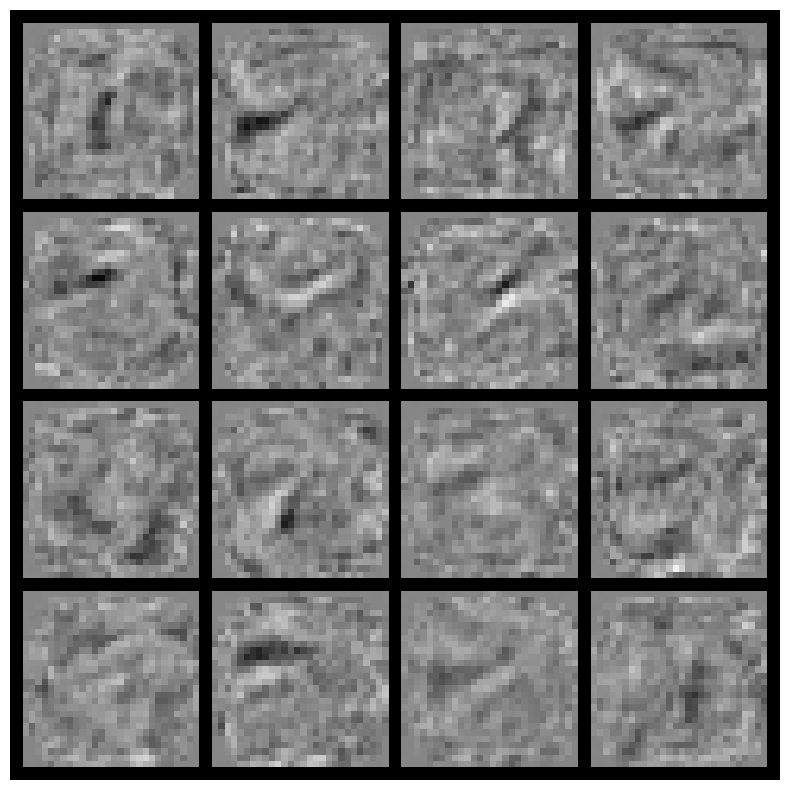

In [69]:
# Visualize linear weights for Batch normalized model
visualize_linear1_weights_2d(model_bn, input_shape=(1, 28, 28))